In [1]:
import pandas as pd

In [2]:
mxe_gencode_filename = '/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/event.sorted.gencode.v19.bed'
mxe_gencode = pd.read_table(mxe_gencode_filename, header=None)
mxe_gencode.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,chr1,17914,29370,isoform1=junction:chr1:18367-29320:-@exon:chr1...,.,-,chr1,HAVANA,gene,14363,29806,.,-,.,"gene_status ""KNOWN""; havana_gene ""OTTHUMG00000...",11456
1,chr1,677192,685396,isoform1=junction:chr1:679354-682074:-@novel_e...,.,-,chr1,HAVANA,gene,677193,685396,.,-,.,"gene_status ""NOVEL""; havana_gene ""OTTHUMG00000...",8204
2,chr1,678665,685396,isoform1=junction:chr1:679354-682074:-@novel_e...,.,-,chr1,HAVANA,gene,677193,685396,.,-,.,"gene_status ""NOVEL""; havana_gene ""OTTHUMG00000...",6731
3,chr1,762987,787490,isoform1=junction:chr1:763156-783033:+@exon:ch...,.,+,chr1,HAVANA,gene,762988,794826,.,+,.,"gene_status ""NOVEL""; havana_gene ""OTTHUMG00000...",24503
4,chr1,762987,784982,isoform1=junction:chr1:763156-783033:+@exon:ch...,.,+,chr1,HAVANA,gene,762988,794826,.,+,.,"gene_status ""NOVEL""; havana_gene ""OTTHUMG00000...",21995


In [74]:
def split_gtf_attributes(attributes):
    split = attributes.split('; ')
    pairs = [x.split(' ') for x in split]
    no_quotes = [map(lambda x: x.strip('";'), pair) for pair in pairs]
    mapping = dict(no_quotes)
    return mapping

In [75]:
%%time

attributes = mxe_gencode[14].map(split_gtf_attributes).apply(pd.Series)
print(attributes.shape)
attributes.head()

(386635, 11)
CPU times: user 3min 10s, sys: 2.63 s, total: 3min 13s
Wall time: 3min 13s


In [76]:
attributes.index = mxe_gencode[3]
attributes.index.name = 'event_id'
attributes.head()

,gene_id,gene_name,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type
event_id,,,,,,,,,,,
isoform1=junction:chr1:18367-29320:-@exon:chr1:18268-18366:-@junction:chr1:18062-18267:-|isoform2=junction:chr1:24892-29320:-@exon:chr1:24738-24891:-@junction:chr1:18062-24737:-,ENSG00000227232.4,WASH7P,KNOWN,pseudogene,OTTHUMG00000000958.1,2,NaN,ENSG00000227232.4,WASH7P,KNOWN,pseudogene
isoform1=junction:chr1:679354-682074:-@novel_exon:chr1:679297-679353:-@junction:chr1:678731-679296:-|isoform2=junction:chr1:680206-682074:-@novel_exon:chr1:680108-680205:-@junction:chr1:678731-680107:-,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,OTTHUMG00000002407.1,2,NaN,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA
isoform1=junction:chr1:679354-682074:-@novel_exon:chr1:679297-679353:-@junction:chr1:678731-679296:-|isoform2=junction:chr1:680206-682074:-@novel_exon:chr1:680108-680205:-@junction:chr1:678731-680107:-,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,OTTHUMG00000002407.1,2,NaN,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA
isoform1=junction:chr1:763156-783033:+@exon:chr1:783034-783186:+@junction:chr1:783187-787306:+|isoform2=junction:chr1:763156-764382:+@exon:chr1:764383-764484:+@junction:chr1:764485-787306:+,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,OTTHUMG00000002468.5,2,NaN,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript
isoform1=junction:chr1:763156-783033:+@exon:chr1:783034-783186:+@junction:chr1:783187-784863:+|isoform2=junction:chr1:763156-764382:+@exon:chr1:764383-764484:+@junction:chr1:764485-784863:+,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,OTTHUMG00000002468.5,2,NaN,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript


In [77]:
attributes['ensembl_id'] = attributes['gene_id'].str.split('.').str[0]
attributes.head()

,gene_id,gene_name,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id
event_id,,,,,,,,,,,,
isoform1=junction:chr1:18367-29320:-@exon:chr1:18268-18366:-@junction:chr1:18062-18267:-|isoform2=junction:chr1:24892-29320:-@exon:chr1:24738-24891:-@junction:chr1:18062-24737:-,ENSG00000227232.4,WASH7P,KNOWN,pseudogene,OTTHUMG00000000958.1,2,NaN,ENSG00000227232.4,WASH7P,KNOWN,pseudogene,ENSG00000227232
isoform1=junction:chr1:679354-682074:-@novel_exon:chr1:679297-679353:-@junction:chr1:678731-679296:-|isoform2=junction:chr1:680206-682074:-@novel_exon:chr1:680108-680205:-@junction:chr1:678731-680107:-,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,OTTHUMG00000002407.1,2,NaN,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,ENSG00000235373
isoform1=junction:chr1:679354-682074:-@novel_exon:chr1:679297-679353:-@junction:chr1:678731-679296:-|isoform2=junction:chr1:680206-682074:-@novel_exon:chr1:680108-680205:-@junction:chr1:678731-680107:-,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,OTTHUMG00000002407.1,2,NaN,ENSG00000235373.1,RP11-206L10.3,NOVEL,lincRNA,ENSG00000235373
isoform1=junction:chr1:763156-783033:+@exon:chr1:783034-783186:+@junction:chr1:783187-787306:+|isoform2=junction:chr1:763156-764382:+@exon:chr1:764383-764484:+@junction:chr1:764485-787306:+,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,OTTHUMG00000002468.5,2,NaN,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,ENSG00000228794
isoform1=junction:chr1:763156-783033:+@exon:chr1:783034-783186:+@junction:chr1:783187-784863:+|isoform2=junction:chr1:763156-764382:+@exon:chr1:764383-764484:+@junction:chr1:764485-784863:+,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,OTTHUMG00000002468.5,2,NaN,ENSG00000228794.4,RP11-206L10.11,NOVEL,processed_transcript,ENSG00000228794


In [78]:
attributes.groupby('transcript_type').size()

transcript_type
3prime_overlapping_ncrna         8
IG_V_pseudogene                 56
antisense                     7568
lincRNA                       3950
miRNA                         2695
misc_RNA                      3941
polymorphic_pseudogene           1
processed_transcript          1972
protein_coding              344783
pseudogene                   11624
rRNA                          1008
sense_intronic                1165
sense_overlapping             1094
snRNA                         1762
snoRNA                        5008
dtype: int64

In [79]:
# bad_transcript_types = 'snoRNA', 'snRNA', 'ncRNA_host', 'antisense', 'miRNA', 'IG_V_pseudogene', \
#     '3prime_overlapping_ncrna', 'misc_RNA', 'rRNA', 'sense_intronic', 'sense_overlapping'

# good_transcript_types = 'lincRNA', 'protein_coding', 'pseudogene', 'processed_transcript'

In [80]:
attributes.shape

(386635, 12)

In [81]:
# attributes_good_transcripts = attributes.query('transcript_type not in @bad_transcript_types')
# print(attributes_good_transcripts.shape)
# # 
# attributes_good_transcripts.head()

In [82]:
len(attributes_good_transcripts.groupby(level=0, axis=0).size())

18181

In [83]:
len(attributes.groupby(level=0, axis=0).size())

18225

In [84]:
transcript_type_sizes = attributes.groupby(level=0, axis=0)['transcript_type'].size()
transcript_type_sizes.head()

event_id
isoform1=junction:chr10:101996727-102003454:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101995522-101997778:-           4
isoform1=junction:chr10:102003535-102013177:-@exon:chr10:102003455-102003534:-@junction:chr10:101997989-102003454:-|isoform2=junction:chr10:102010071-102013177:-@novel_exon:chr10:102010005-102010070:-@junction:chr10:101997989-102010004:-    12
isoform1=junction:chr10:102003535-102013177:-@exon:chr10:102003455-102003534:-@junction:chr10:101997989-102003454:-|isoform2=junction:chr10:102010090-102013177:-@exon:chr10:102010005-102010089:-@junction:chr10:101997989-102010004:-          12
isoform1=junction:chr10:102016234-102020722:-@exon:chr10:102016019-102016233:-@junction:chr10:102013297-102016018:-|isoform2=junction:chr10:102020077-102020722:-@exon:chr10:102019975-102020076:-@junction:chr10:102013297-102019974:-           4
isoform1=juncti

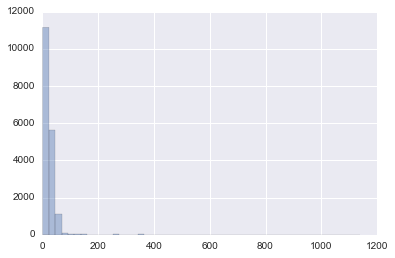

In [85]:
import seaborn as sns
%matplotlib inline

sns.distplot(transcript_type_sizes, kde=False)

In [86]:
transcript_type_sizes[transcript_type_sizes > 500]

event_id
isoform1=junction:chr12:11035696-11324020:-@exon:chr12:11035660-11035695:-@junction:chr12:11035298-11035659:-|isoform2=junction:chr12:11126321-11324020:-@exon:chr12:11126254-11126320:-@junction:chr12:11035298-11126253:-     528
isoform1=junction:chr19:50414624-50432582:-@exon:chr19:50414362-50414623:-@junction:chr19:50413142-50414361:-|isoform2=junction:chr19:50431073-50432582:-@exon:chr19:50430951-50431072:-@junction:chr19:50413142-50430950:-    1140
isoform1=junction:chr19:50414624-50432582:-@exon:chr19:50414362-50414623:-@junction:chr19:50413142-50414361:-|isoform2=junction:chr19:50431106-50432582:-@exon:chr19:50430951-50431105:-@junction:chr19:50413142-50430950:-    1140
dtype: int64

In [90]:
# attributes.loc[transcript_type_sizes.index[transcript_type_sizes > 500]]

In [91]:
attributes_grouped = attributes.groupby(level=0, axis=0).apply(lambda df: df.apply(
        lambda x: ','.join(map(str, set(x.values)))))
print(attributes_grouped.shape)
attributes_grouped.head(2)

(18225, 12)


,gene_id,gene_name,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id
event_id,,,,,,,,,,,,
isoform1=junction:chr10:101996727-102003454:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101995522-101997778:-,"ENSG00000212464.1,ENSG00000095485.12","CWF19L1,SNORA12",KNOWN,"snoRNA,protein_coding","nan,OTTHUMG00000018901.5","3,2","nan,ncRNA_host","ENSG00000212464.1,ENSG00000095485.12","CWF19L1,SNORA12",KNOWN,"snoRNA,protein_coding","ENSG00000212464,ENSG00000095485"
isoform1=junction:chr10:102003535-102013177:-@exon:chr10:102003455-102003534:-@junction:chr10:101997989-102003454:-|isoform2=junction:chr10:102010071-102013177:-@novel_exon:chr10:102010005-102010070:-@junction:chr10:101997989-102010004:-,"ENSG00000095485.12,ENSG00000230224.1","CWF19L1,PHBP9",KNOWN,"pseudogene,protein_coding","OTTHUMG00000018901.5,OTTHUMG00000018902.1","1,2","pseudo_consens,ncRNA_host","ENSG00000095485.12,ENSG00000230224.1","CWF19L1,PHBP9",KNOWN,"pseudogene,protein_coding","ENSG00000230224,ENSG00000095485"


In [89]:
ls /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events*

/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv
/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv.back
/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv.bak


In [15]:
# ! cp /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv \
#     /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv.bak

In [16]:
mxe_events = pd.read_csv('/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/events.csv', index_col=0)
print(mxe_events.shape)
mxe_events.head(2)

(325347, 5)


,junction12,junction13,junction24,junction34,incompatible_junctions
event_id,,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212301-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212079:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212288-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...
isoform1=junction:chr17:75212080-75212209:+@novel_exon:chr17:75212210-75212300:+@junction:chr17:75212301-75212378:+|isoform2=junction:chr17:75212080-75212170:+@novel_exon:chr17:75212171-75212209:+@junction:chr17:75212210-75212378:+,junction:chr17:75212080-75212170:+,junction:chr17:75212080-75212209:+,junction:chr17:75212210-75212378:+,junction:chr17:75212301-75212378:+,junction:chr17:75212080-75212378:+|junction:ch...
isoform1=junction:chr17:75212018-75212157:+@novel_exon:chr17:75212158-75212222:+@junction:chr17:75212223-75212274:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212157:+@junction:chr17:75212158-75212274:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212157:+,junction:chr17:75212158-75212274:+,junction:chr17:75212223-75212274:+,junction:chr17:75212018-75212274:+|junction:ch...
isoform1=junction:chr5:180668640-180670691:-@exon:chr5:180668492-180668639:-@junction:chr5:180666583-180668491:-|isoform2=junction:chr5:180669235-180670691:-@novel_exon:chr5:180669170-180669234:-@junction:chr5:180666583-180669169:-,junction:chr5:180669235-180670691:-,junction:chr5:180668640-180670691:-,junction:chr5:180666583-180669169:-,junction:chr5:180666583-180668491:-,junction:chr5:180666583-180670691:-|junction:c...


In [53]:
mxe_events_not_duplicated = mxe_events.drop_duplicates()
print(mxe_events_not_duplicated.shape)
mxe_events_not_duplicated.head(2)

(18257, 5)


,junction12,junction13,junction24,junction34,incompatible_junctions
event_id,,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212301-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212079:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212288-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...


In [26]:
# ! head -n 5 /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/exon*.bed

In [27]:
from outrigger.region import Region

In [28]:
mxe_exon_bed_template = '/home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2/index/mxe/exon{}.bed'

exons = {}

for i in range(1, 5):
    exon = 'exon{}'.format(i)
    bed = mxe_exon_bed_template.format(i)
    exon_df = pd.read_table(bed, names=['chrom', 'start', 'stop', 'name', 'score', 'strand'])
    exon_regions = exon_df.apply(lambda row: Region('exon:{chrom}:{start}-{stop}:{strand}'.format(
                chrom=row.chrom, start=row.start+1, stop=row.stop, strand=row.strand)), axis=1)
    exons[exon] = exon_regions
exon_regions_df = pd.DataFrame(exons)
exon_regions_df.head()

,exon1,exon2,exon3,exon4
0,outrigger.Region (exon:chr17:75211927-75212017:+),outrigger.Region (exon:chr17:75212132-75212144:+),outrigger.Region (exon:chr17:75212223-75212300:+),outrigger.Region (exon:chr17:75212327-75212352:+)
1,outrigger.Region (exon:chr17:75211940-75212017:+),outrigger.Region (exon:chr17:75212080-75212144:+),outrigger.Region (exon:chr17:75212223-75212287:+),outrigger.Region (exon:chr17:75212327-75212417:+)
2,outrigger.Region (exon:chr17:75212005-75212079:+),outrigger.Region (exon:chr17:75212171-75212209:+),outrigger.Region (exon:chr17:75212210-75212300:+),outrigger.Region (exon:chr17:75212379-75212391:+)
3,outrigger.Region (exon:chr17:75211979-75212017:+),outrigger.Region (exon:chr17:75212132-75212157:+),outrigger.Region (exon:chr17:75212158-75212222:+),outrigger.Region (exon:chr17:75212275-75212300:+)
4,outrigger.Region (exon:chr5:180670692-18067087...,outrigger.Region (exon:chr5:180669170-18066923...,outrigger.Region (exon:chr5:180668492-18066863...,outrigger.Region (exon:chr5:180666517-18066658...


In [29]:
exon_regions_df.shape

(325347, 4)

In [30]:
exon_str = exon_regions_df.applymap(lambda x: x.name)
exon_str.head()

,exon1,exon2,exon3,exon4
0,exon:chr17:75211927-75212017:+,exon:chr17:75212132-75212144:+,exon:chr17:75212223-75212300:+,exon:chr17:75212327-75212352:+
1,exon:chr17:75211940-75212017:+,exon:chr17:75212080-75212144:+,exon:chr17:75212223-75212287:+,exon:chr17:75212327-75212417:+
2,exon:chr17:75212005-75212079:+,exon:chr17:75212171-75212209:+,exon:chr17:75212210-75212300:+,exon:chr17:75212379-75212391:+
3,exon:chr17:75211979-75212017:+,exon:chr17:75212132-75212157:+,exon:chr17:75212158-75212222:+,exon:chr17:75212275-75212300:+
4,exon:chr5:180670692-180670872:-,exon:chr5:180669170-180669234:-,exon:chr5:180668492-180668639:-,exon:chr5:180666517-180666582:-


In [31]:
print(exon_str.shape)

(325347, 4)


In [32]:
exon_str_not_duplicated = exon_str.drop_duplicates()
print(exon_str_not_duplicated.shape)
exon_str_not_duplicated.head()

(325347, 4)


,exon1,exon2,exon3,exon4
0,exon:chr17:75211927-75212017:+,exon:chr17:75212132-75212144:+,exon:chr17:75212223-75212300:+,exon:chr17:75212327-75212352:+
1,exon:chr17:75211940-75212017:+,exon:chr17:75212080-75212144:+,exon:chr17:75212223-75212287:+,exon:chr17:75212327-75212417:+
2,exon:chr17:75212005-75212079:+,exon:chr17:75212171-75212209:+,exon:chr17:75212210-75212300:+,exon:chr17:75212379-75212391:+
3,exon:chr17:75211979-75212017:+,exon:chr17:75212132-75212157:+,exon:chr17:75212158-75212222:+,exon:chr17:75212275-75212300:+
4,exon:chr5:180670692-180670872:-,exon:chr5:180669170-180669234:-,exon:chr5:180668492-180668639:-,exon:chr5:180666517-180666582:-


In [33]:
event_location.shape

(386635,)

In [34]:
exon_str.index = mxe_events.index
print(exon_str.shape)
exon_str.head(2)

(325347, 4)


,exon1,exon2,exon3,exon4
event_id,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,exon:chr17:75211927-75212017:+,exon:chr17:75212132-75212144:+,exon:chr17:75212223-75212300:+,exon:chr17:75212327-75212352:+
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,exon:chr17:75211940-75212017:+,exon:chr17:75212080-75212144:+,exon:chr17:75212223-75212287:+,exon:chr17:75212327-75212417:+


In [37]:
mxe_events_attributes = mxe_events_not_duplicated.join(attributes_grouped)
print(mxe_events_attributes.shape)
# mxe_events_attributes = mxe_events_attributes.join(event_location)
print(mxe_events_attributes.shape)
mxe_events_attributes.head(2)

(18257, 17)
(18257, 17)


,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,gene_name,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id
event_id,,,,,,,,,,,,,,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212301-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...,ENSG00000129657.10,SEC14L1,KNOWN,protein_coding,OTTHUMG00000177311.10,1,nan,ENSG00000129657.10,SEC14L1,KNOWN,protein_coding,ENSG00000129657
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212079:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212288-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...,ENSG00000129657.10,SEC14L1,KNOWN,protein_coding,OTTHUMG00000177311.10,1,nan,ENSG00000129657.10,SEC14L1,KNOWN,protein_coding,ENSG00000129657


In [40]:
event_location.shape

(386635,)

In [38]:
mxe_events_attributes.shape

(18257, 17)

In [46]:
(~mxe_events_attributes.index.isin(exon_str.index)).sum()

0

In [47]:
(~exon_str.index.isin(mxe_events_attributes.index)).sum()

0

In [51]:
attributes.head(1)

,gene_id,gene_name,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id
event_id,,,,,,,,,,,,
isoform1=junction:chr1:18367-29320:-@exon:chr1:18268-18366:-@junction:chr1:18062-18267:-|isoform2=junction:chr1:24892-29320:-@exon:chr1:24738-24891:-@junction:chr1:18062-24737:-,ENSG00000227232.4,WASH7P,KNOWN,pseudogene,OTTHUMG00000000958.1,2,NaN,ENSG00000227232.4,WASH7P,KNOWN,pseudogene,ENSG00000227232


In [52]:
attributes.shape

(386635, 12)

In [ ]:
attributes.index

In [54]:
len(attributes.groupby(level=0, axis=0).size())

18225

In [50]:
exon_events_not_duplicated = exon_str.join(mxe_events_not_duplicated)
print(exon_events_not_duplicated.shape)
exon_events_not_duplicated.head(1)

(325347, 9)


,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions
event_id,,,,,,,,,
isoform1=junction:chr10:101996727-102003454:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101995522-101997778:-,exon:chr10:102003455-102003534:-,exon:chr10:101997779-101997988:-,exon:chr10:101996607-101996726:-,exon:chr10:101995424-101995521:-,junction:chr10:101997989-102003454:-,junction:chr10:101996727-102003454:-,junction:chr10:101995522-101997778:-,junction:chr10:101995522-101996606:-,junction:chr10:101995522-102003454:-|junction:...


In [55]:
len(exon_events_not_duplicated.groupby(level=0, axis=0).size())

18257

In [45]:
mxe_metadata = exon_str.join(mxe_events_attributes, how='right')
print(mxe_metadata.shape)
mxe_metadata.head(2)

(325347, 21)


,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,...,gene_status,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:101996727-102003454:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101995522-101997778:-,exon:chr10:102003455-102003534:-,exon:chr10:101997779-101997988:-,exon:chr10:101996607-101996726:-,exon:chr10:101995424-101995521:-,junction:chr10:101997989-102003454:-,junction:chr10:101996727-102003454:-,junction:chr10:101995522-101997778:-,junction:chr10:101995522-101996606:-,junction:chr10:101995522-102003454:-|junction:...,ENSG00000095485.12,...,KNOWN,protein_coding,OTTHUMG00000018901.5,2,ncRNA_host,ENSG00000095485.12,CWF19L1,KNOWN,protein_coding,ENSG00000095485
isoform1=junction:chr10:101996727-102003454:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101995522-101997778:-,exon:chr10:102003455-102003529:-,exon:chr10:101997779-101997988:-,exon:chr10:101996607-101996726:-,exon:chr10:101995424-101995521:-,junction:chr10:101997989-102003454:-,junction:chr10:101996727-102003454:-,junction:chr10:101995522-101997778:-,junction:chr10:101995522-101996606:-,junction:chr10:101995522-102003454:-|junction:...,ENSG00000095485.12,...,KNOWN,protein_coding,OTTHUMG00000018901.5,2,ncRNA_host,ENSG00000095485.12,CWF19L1,KNOWN,protein_coding,ENSG00000095485


In [42]:
print(event_location.shape)
event_location_subset = event_location.loc[mxe_metadata.index]
print(event_location_subset.shape)

(386635,)
(14621575,)


In [43]:
# mxe_metadata_locations = pd.concat([mxe_metadata, event_location_subset], axis=1)
# print(mxe_metadata_locations.shape)
# mxe_metadata_locations.head(2)

ValueError: Shape of passed values is (22, 325347), indices imply (22, 18257)

In [ ]:
mxe_metadata['ensembl_id'] = mxe_metadata['gene_id'].str.split('.').str[0]
mxe_metadata.head(2)

In [61]:
mxe_metadata.query('gene_name == "SNAP25"')

,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,...,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id,event_location
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199480-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199480-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199478-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199478-10199625:+,exon:chr20:10207990-1

In [62]:
mxe_metadata.query('"SNAP25" in gene_name')

,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,...,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id,event_location
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199480-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199481-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199480-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199478-10199625:+,exon:chr20:10207990-10208086:+,exon:chr20:10224623-10224682:+,exon:chr20:10256077-10256211:+,junction:chr20:10199626-10207989:+,junction:chr20:10199626-10224622:+,junction:chr20:10208087-10256076:+,junction:chr20:10224683-10256076:+,junction:chr20:10199626-10256076:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10199477-10256211:+
isoform1=junction:chr20:10199626-10224622:+@novel_exon:chr20:10224623-10224682:+@junction:chr20:10224683-10256076:+|isoform2=junction:chr20:10199626-10207989:+@novel_exon:chr20:10207990-10208086:+@junction:chr20:10208087-10256076:+,exon:chr20:10199478-10199625:+,exon:chr20:10207990-1

In [63]:
snap25_exons = u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'.split(u'@')

In [64]:
mxe_metadata.query('exon2 in @snap25_exons')

,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,...,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id,event_location
isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+,exon:chr20:10265372-10265420:+,exon:chr20:10273530-10273647:+,exon:chr20:10273809-10273926:+,exon:chr20:10277573-10277698:+,junction:chr20:10265421-10273529:+,junction:chr20:10265421-10273808:+,junction:chr20:10273648-10277572:+,junction:chr20:10273927-10277572:+,junction:chr20:10265421-10277572:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10265371-10277698:+
isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+,exon:chr20:10265372-10265420:+,exon:chr20:10273530-10273647:+,exon:chr20:10273809-10273926:+,exon:chr20:10277573-10277698:+,junction:chr20:10265421-10273529:+,junction:chr20:10265421-10273808:+,junction:chr20:10273648-10277572:+,junction:chr20:10273927-10277572:+,junction:chr20:10265421-10277572:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10265371-10277698:+


In [65]:
mxe_metadata.loc[mxe_metadata['exon1'].str.startswith('exon:chr20:1026')]

,exon1,exon2,exon3,exon4,junction12,junction13,junction24,junction34,incompatible_junctions,gene_id,...,gene_type,havana_gene,level,tag,transcript_id,transcript_name,transcript_status,transcript_type,ensembl_id,event_location
isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+,exon:chr20:10265372-10265420:+,exon:chr20:10273530-10273647:+,exon:chr20:10273809-10273926:+,exon:chr20:10277573-10277698:+,junction:chr20:10265421-10273529:+,junction:chr20:10265421-10273808:+,junction:chr20:10273648-10277572:+,junction:chr20:10273927-10277572:+,junction:chr20:10265421-10277572:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10265371-10277698:+
isoform1=junction:chr20:10265421-10273808:+@exon:chr20:10273809-10273926:+@junction:chr20:10273927-10277572:+|isoform2=junction:chr20:10265421-10273529:+@exon:chr20:10273530-10273647:+@junction:chr20:10273648-10277572:+,exon:chr20:10265372-10265420:+,exon:chr20:10273530-10273647:+,exon:chr20:10273809-10273926:+,exon:chr20:10277573-10277698:+,junction:chr20:10265421-10273529:+,junction:chr20:10265421-10273808:+,junction:chr20:10273648-10277572:+,junction:chr20:10273927-10277572:+,junction:chr20:10265421-10277572:+|junction:ch...,ENSG00000132639.8,...,protein_coding,OTTHUMG00000031863.3,2,nan,ENSG00000132639.8,SNAP25,KNOWN,protein_coding,ENSG00000132639,chr20:10265371-10277698:+


In [66]:
mxe_metadata.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/outrigger_v2/index/mxe/manual_metadata.csv')

In [31]:

mxe_metadata.query('gene_name == "PKM"').index.unique()

Index([u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'], dtype='object')

## Use outrigger's `SplicingAnnotator`


In [92]:
from outrigger.io.gtf import SplicingAnnotator

In [93]:
import gffutils

outrigger_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/outrigger_v2'

db_filename = '{}/index/gtf/gencode.v19.annotation.gtf.db'.format(outrigger_folder)

db = gffutils.FeatureDB(db_filename)

In [94]:
events_dict = mxe_events.T.to_dict()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:882: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [97]:
mxe_events

,junction12,junction13,junction24,junction34,incompatible_junctions
event_id,,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212301-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,junction:chr17:75212018-75212079:+,junction:chr17:75212018-75212222:+,junction:chr17:75212145-75212326:+,junction:chr17:75212288-75212326:+,junction:chr17:75212018-75212326:+|junction:ch...
isoform1=junction:chr17:75212080-75212209:+@novel_exon:chr17:75212210-75212300:+@junction:chr17:75212301-75212378:+|isoform2=junction:chr17:75212080-75212170:+@novel_exon:chr17:75212171-75212209:+@junction:chr17:75212210-75212378:+,junction:chr17:75212080-75212170:+,junction:chr17:75212080-75212209:+,junction:chr17:75212210-75212378:+,junction:chr17:75212301-75212378:+,junction:chr17:75212080-75212378:+|junction:ch...
isoform1=junction:chr17:75212018-75212157:+@novel_exon:chr17:75212158-75212222:+@junction:chr17:75212223-75212274:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212157:+@junction:chr17:75212158-75212274:+,junction:chr17:75212018-75212131:+,junction:chr17:75212018-75212157:+,junction:chr17:75212158-75212274:+,junction:chr17:75212223-75212274:+,junction:chr17:75212018-75212274:+|junction:ch...
isoform1=junction:chr5:180668640-180670691:-@exon:chr5:180668492-180668639:-@junction:chr5:180666583-180668491:-|isoform2=junction:chr5:180669235-180670691:-@novel_exon:chr5:180669170-180669234:-@junction:chr5:180666583-180669169:-,junction:chr5:180669235-180670691:-,junction:chr5:180668640-180670691:-,junction:chr5:180666583-180669169:-,junction:chr5:180666583-180668491:-,junction:chr5:180666583-180670691:-|junction:c...
isoform1=junction:chr17:75212018-75212157:+@novel_exon:chr17:75212158-75212222:+@junction:chr17:75212223-75212274:+|isoform2=junction:chr17:75212018-75212105:+@novel_exon:chr17:75212106-75212144:+@junction:chr17:75212145-75212274:+,junction:chr17:75212018-75212105:+,junction:chr17:75212018-75212157:+,junction:chr17:75212145-75212274:+,junction:chr17:75212223-75212274:+,junction:chr17:75212018-75212274:+|junction:ch...
isoform1=junction:chr17:75211927-75212066:+@novel_exon:chr17:75212067-75212157:+@junction:chr17:75212158-75212248:+|isoform2=junction:chr17:75211927-75211978:+@novel_exon:chr17:75211979-75211991:+@junction:chr17:75211992-75212248:+,junction:chr17:75211927-75211978:+,junction:chr17:75211927-75212066:+,junction:chr17:75211992-75212248:+,junction:chr17:75212158-75212248:+,junction:chr17:75211927-75212248:+|junction:ch...
isoform1=junction:chr11:125330563-125351429:-@exon:chr11:125330394-125330562:-@junction:chr11:125326003-125330393:-|isoform2=junction:chr11:125333467-125351429:-@exon:chr11:125333380-125333466:-@junction:chr11:125326003-125333379:-,junction:chr11:125333467-125351429:-,junction:chr11:125330563-125351429:-,junction:chr11:125326003-125333379:-,junction:chr11:125326003-125330393:-,junction:chr11:125326003-125351429:-|junction:...
isoform1=junction:chr14:100840582-100842596:-@exon:chr14:100840473-100840581:-@junction:chr14:100828259-100840472:-|isoform2=junction:chr14:100841744-100842596:-@exon:chr14:100841620-100841743:-@junction:chr14:100828259-100841619:-,junction:chr14:100841744-100842596:-,junction:chr14:100840582-100842596:-,junction:chr14:100828259-100841619:-,junction:chr14:100828259-100840472:-,junction:chr14:100828259-100842596:-|junction:...


In [98]:
splicing_annotator = SplicingAnnotator(db, events=exon_str, splice_type='mxe')

In [99]:
range(3)

[0, 1, 2]

In [102]:
exon_str.head(2)

,exon1,exon2,exon3,exon4
event_id,,,,
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212300:+@junction:chr17:75212301-75212326:+|isoform2=junction:chr17:75212018-75212131:+@novel_exon:chr17:75212132-75212144:+@junction:chr17:75212145-75212326:+,exon:chr17:75211927-75212017:+,exon:chr17:75212132-75212144:+,exon:chr17:75212223-75212300:+,exon:chr17:75212327-75212352:+
isoform1=junction:chr17:75212018-75212222:+@novel_exon:chr17:75212223-75212287:+@junction:chr17:75212288-75212326:+|isoform2=junction:chr17:75212018-75212079:+@novel_exon:chr17:75212080-75212144:+@junction:chr17:75212145-75212326:+,exon:chr17:75211940-75212017:+,exon:chr17:75212080-75212144:+,exon:chr17:75212223-75212287:+,exon:chr17:75212327-75212417:+


In [100]:
attributes = splicing_annotator.attributes()

FeatureNotFoundError: exon:chr17:75211927-75212017:+

In [105]:
list(db.region('chr17:75211927-75212017', featuretype='exon'))

[<Feature exon (chr17:75210000-75212884[+]) at 0x2b8cf44a6150>,
 <Feature exon (chr17:75210000-75212017[+]) at 0x2b8cf44e8bd0>,
 <Feature exon (chr17:75210000-75212988[+]) at 0x2b8cf44e8c50>]

In [106]:
list(db.region('chr17:75211927-75212017', featuretype='gene'))

[<Feature gene (chr17:75082798-75213179[+]) at 0x2b8cf82888d0>]